In [2]:
import torch
X = torch.Tensor(2,3)
print(X)

tensor([[0.0000e+00, 0.0000e+00, 2.1019e-44],
        [0.0000e+00, 3.7826e-06, 5.5211e-43]])


In [4]:
X = torch.Tensor([[1,2,3],[4,5,6]])
print(X)

tensor([[1., 2., 3.],
        [4., 5., 6.]])


## torch.Tensor(data, dtype, device, requires_grad)

data : 데이터  
dtype : 데이터 타입  
device : 어느 기기에 Tensor을 올릴것인지 명시  
requires_grad : Tensor에 기울기를 저장할지 여부를 지정  

In [77]:
import torch

x = torch.tensor(data = [2.0, 3.0], requires_grad = True)
y = x**2
z = 2*y + 3

target = torch.tensor([3.0, 4.0])
loss = torch.sum(torch.abs(z - target))
loss.backward()

print(x.grad, y.grad, z.grad)

tensor([ 8., 12.]) None None


C:\Users\bin\AppData\Local\Temp\ipykernel_15208\4223443238.py:11: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at C:\cb\pytorch_1000000000000\work\build\aten\src\ATen/core/TensorBody.h:485.)
  print(x.grad, y.grad, z.grad)


In [78]:
def gen_lin(point_x, point_y, grad):
    xs = torch.linspace(point_x-2, point_x+2, 30)
    ys = torch.linspace(point_y-2*grad, point_y+2 * grad, 30)
    return xs, ys

Text(0, 0.5, 'y')

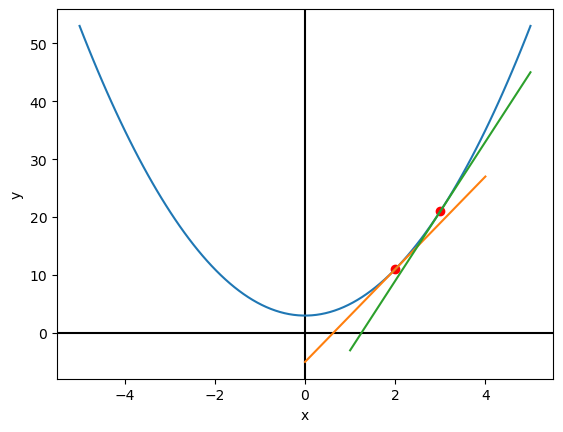

In [79]:
import matplotlib.pyplot as plt
import torch
X = torch.linspace(-5,5,100)
Y = X**2
Z = 2*Y + 3

xs, ys = gen_lin(x.detach().numpy()[0], z.detach().numpy()[0], x.grad[0].item())
xs1, ys1 = gen_lin(x.detach().numpy()[1], z.detach().numpy()[1], x.grad[1].item())
plt.axhline(y=0, color='black') # y=0인 수직보조선
plt.axvline(x=0, color='black') # x=0인 수직보조선
plt.plot(X, Z)
plt.scatter(x.detach().numpy(),z.detach().numpy(), c = 'r')
plt.plot(xs,ys)
plt.plot(xs1,ys1)
plt.xlabel('x')
plt.ylabel('y')

Text(0, 0.5, 'y')

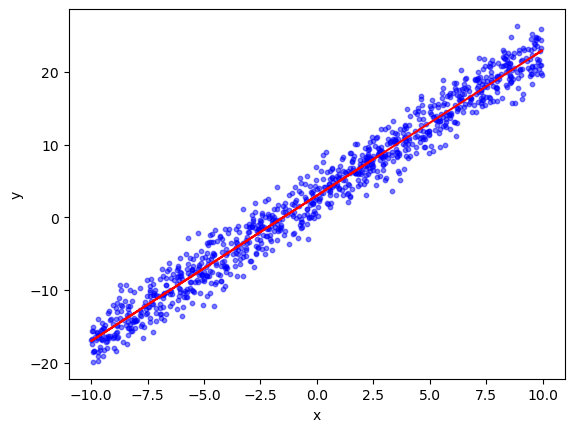

In [80]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init

num_data = 1000
num_epoch = 500

x = init.uniform_(torch.Tensor(num_data,1), -10,10)
noise = init.normal_(torch.FloatTensor(num_data,1), std = 1)
y = 2*x + 3
y_noise = 2*(x+noise)+3


import matplotlib.pyplot as plt

plt.scatter(x,y_noise, alpha = 0.5, s = 10, c = 'b')
plt.plot(x,y, c = 'r')
plt.xlabel('x')
plt.ylabel('y')

tensor(7.9527)
tensor(2.2309)
tensor(2.0368)
tensor(1.9066)
tensor(1.8106)
tensor(1.7429)
tensor(1.6962)
tensor(1.6642)
tensor(1.6437)
tensor(1.6296)
2.029371738433838 2.6214804649353027


Text(0, 0.5, 'loss')

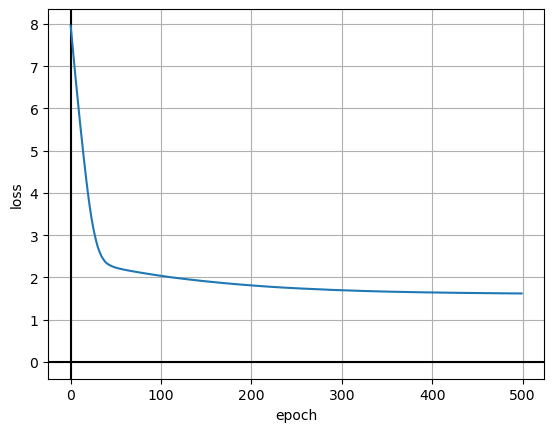

In [86]:
model = nn.Linear(1,1)
loss_func = nn.L1Loss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

label = y_noise

loss_arr= []

for i in range(num_epoch):
    optimizer.zero_grad()
    output = model(x)
    loss = loss_func(output,label)
    loss.backward()
    optimizer.step()
    
    if i % 50 == 0:
        print(loss.data)
    loss_arr.append(loss.detach().numpy())
    
params_list = list(model.parameters())
print(params_list[0].item(), params_list[1].item())


plt.axhline(y=0, color='black') # y=0인 수직보조선
plt.axvline(x=0, color='black') # x=0인 수직보조선
plt.grid()
plt.plot(range(num_epoch), loss_arr)
plt.xlabel('epoch')
plt.ylabel('loss')
